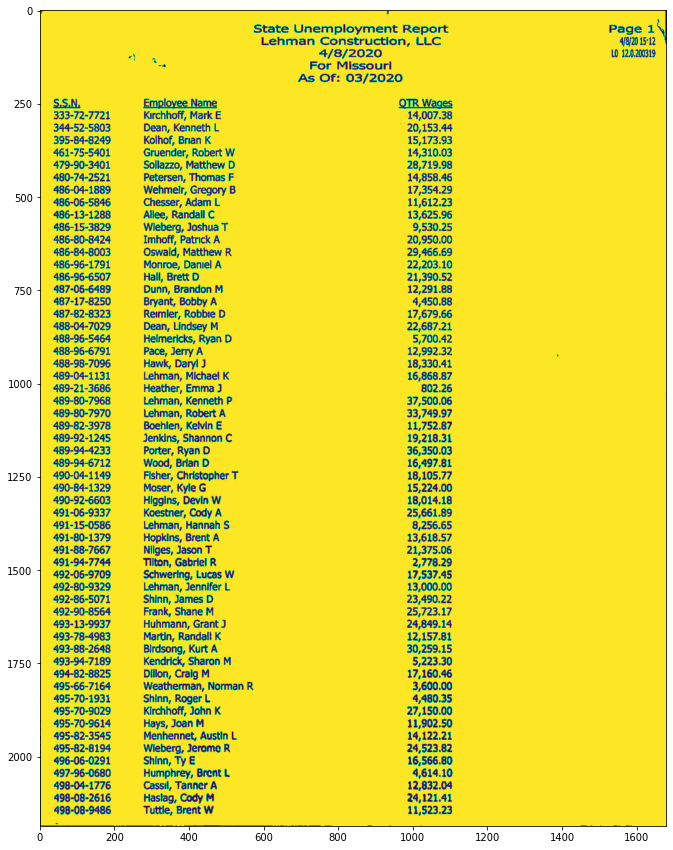

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')

plt.figure(figsize=(15,15))
# Output Images
plt.imshow(img)

In [3]:
from PIL import Image
import cv2
  
# Opens a image in RGB mode
im = Image.open(r"/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg")
#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /10
right = 1600
bottom = 3 * height / 3
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
  
# Shows the image in image viewer

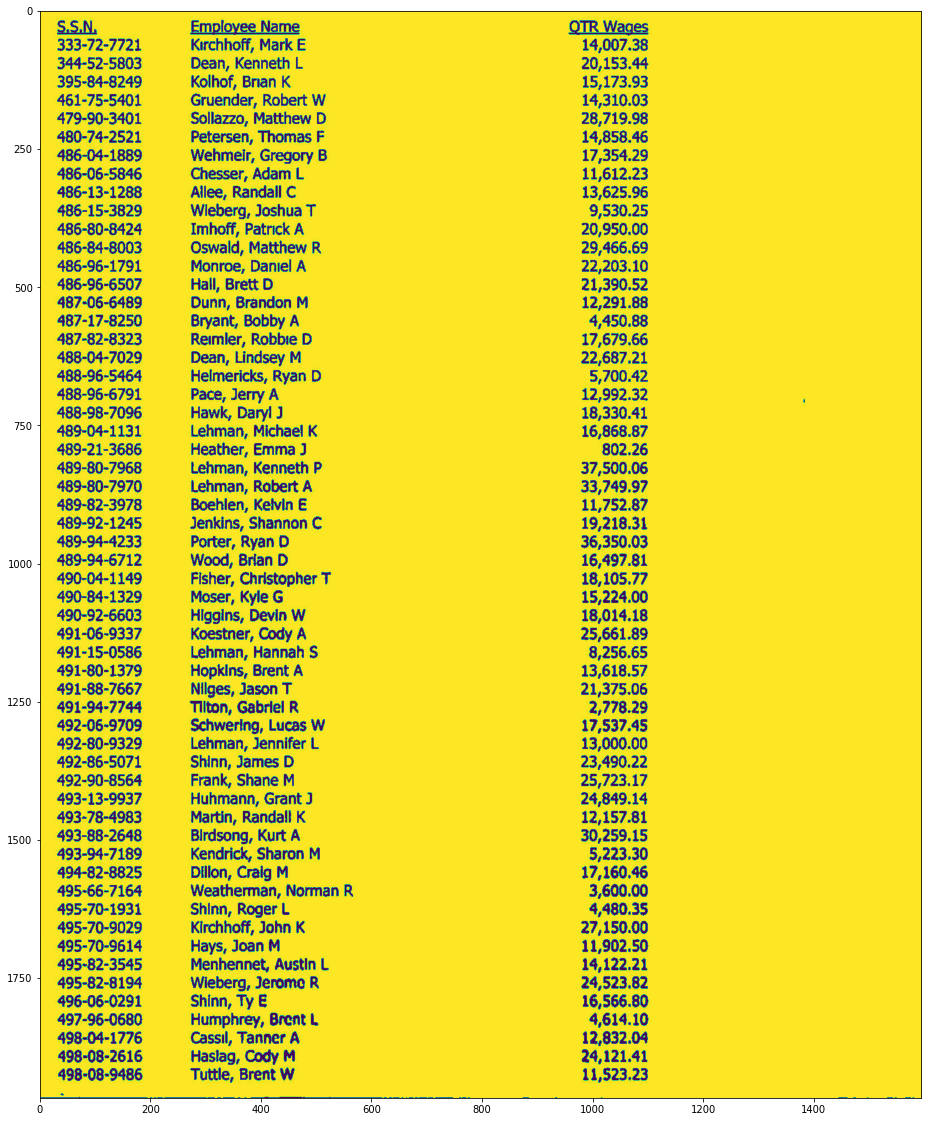

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(im1)
#im1.save('crop_img')
im1.save('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0347682000_crop.jpeg')

In [5]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0347682000_crop.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




SSN.               Employee Name                                    QTR Wages 
  333-72-7721      Kirchhoff Mark E                                   14.007.38 
  344-52-5803      Dean  Kenneth L                                    20.153.44 
  395-84-8249      Kolhof. Bran K                                     15.173.93 
  461-75-5401      Gruender Robert W                                  14.310.03 
  479-90-3401      Sollazzo Matthew D                                 28.719.98 
  480-74-2521      Petersen Thomas F                                  14.858.46 
  486-04-1889      Wehmelr  Gregory B                                 17354.29 
  486-06-5846      Chesser Adam  L                                    11612.23 
  486-13-1288      Allee Randall C                                    13625.96 
  486-15-3829      Wieberg. Joshua T                                   9/530.25 
  486-80-8424      Imhoff. Patrick A                                  20950.00 
  486-84-8003      Oswald. Matthe

In [19]:
type(text)

str

In [6]:
text_file = open("/home/vimal/Documents/table_detect_samples/unstructured tables/text/0347682000_text.txt", "wt")
n = text_file.write(text)
text_file.close()

In [7]:
import pandas as pd
  
# readinag given csv file
# and creating dataframe
dataframe1 = pd.read_csv("/home/vimal/Documents/table_detect_samples/unstructured tables/text/0347682000_text.txt")
  
# storing this dataframe in a csv file
x=dataframe1.to_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/CSV/0347682000_excel.csv', 
                  index = None)

In [20]:
dataframe1

,SSN. Employee Name QTR Wages
0,333-72-7721 Kirchhoff Mark E ...
1,344-52-5803 Dean Kenneth L ...
2,395-84-8249 Kolhof. Bran K ...
3,461-75-5401 Gruender Robert W ...
4,479-90-3401 Sollazzo Matthew D ...
5,480-74-2521 Petersen Thomas F ...
6,486-04-1889 Wehmelr Gregory B ...
7,486-06-5846 Chesser Adam L ...
8,486-13-1288 Allee Randall C ...
9,486-15-3829 Wieberg. Joshua T ...


In [16]:
dataframe1

,SSN. Employee Name QTR Wages
0,333-72-7721 Kirchhoff Mark E ...
1,344-52-5803 Dean Kenneth L ...
2,395-84-8249 Kolhof. Bran K ...
3,461-75-5401 Gruender Robert W ...
4,479-90-3401 Sollazzo Matthew D ...
5,480-74-2521 Petersen Thomas F ...
6,486-04-1889 Wehmelr Gregory B ...
7,486-06-5846 Chesser Adam L ...
8,486-13-1288 Allee Randall C ...
9,486-15-3829 Wieberg. Joshua T ...


In [12]:
dataframe1.dataframe1[0].split(expand=True,)

AttributeError: 'DataFrame' object has no attribute 'dataframe1'

In [9]:
dataframe1.shape

(57, 1)

In [10]:
dataframe1.columns

Index(['SSN.               Employee Name                                    QTR Wages '], dtype='object')

In [7]:
# importing pandas as pd
import pandas as pd
# import the StrinIO function
# from io module
from io import StringIO
# wrap the string data in StringIO function
StringData = StringIO(text)
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =",")
# Print the dataframe
print(df)

   SSN.               Employee Name                                    QTR Wages 
0     333-72-7721      Kirchhoff Mark E           ...                            
1     344-52-5803      Dean  Kenneth L            ...                            
2     395-84-8249      Kolhof. Bran K             ...                            
3     461-75-5401      Gruender Robert W          ...                            
4     479-90-3401      Sollazzo Matthew D         ...                            
5     480-74-2521      Petersen Thomas F          ...                            
6     486-04-1889      Wehmelr  Gregory B         ...                            
7     486-06-5846      Chesser Adam  L            ...                            
8     486-13-1288      Allee Randall C            ...                            
9     486-15-3829      Wieberg. Joshua T          ...                            
10    486-80-8424      Imhoff. Patrick A          ...                            
11    486-84-800

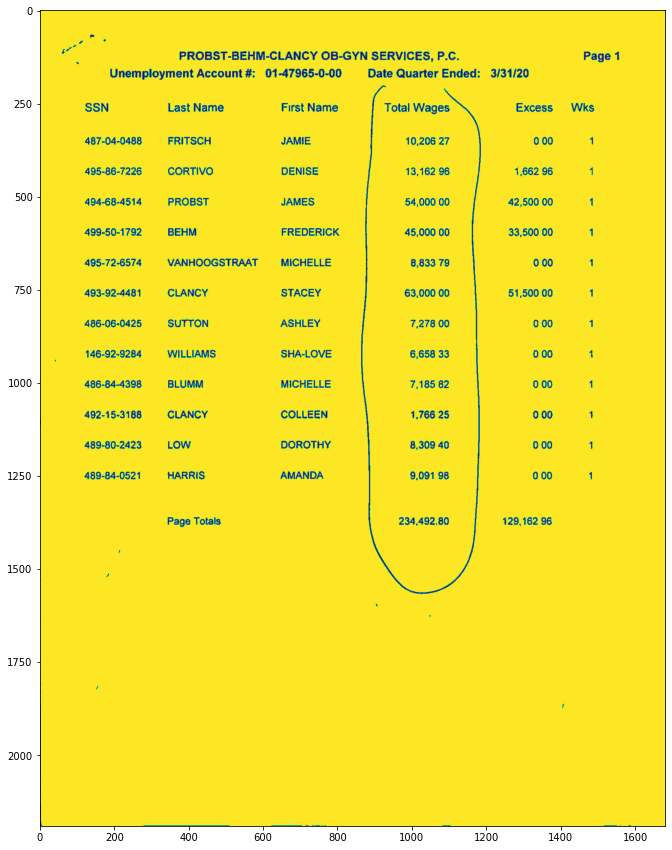

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/home/vimal/Documents/table_detect_samples/pre/0147965000.jpeg')

plt.figure(figsize=(15,15))
# Output Images
plt.imshow(img)

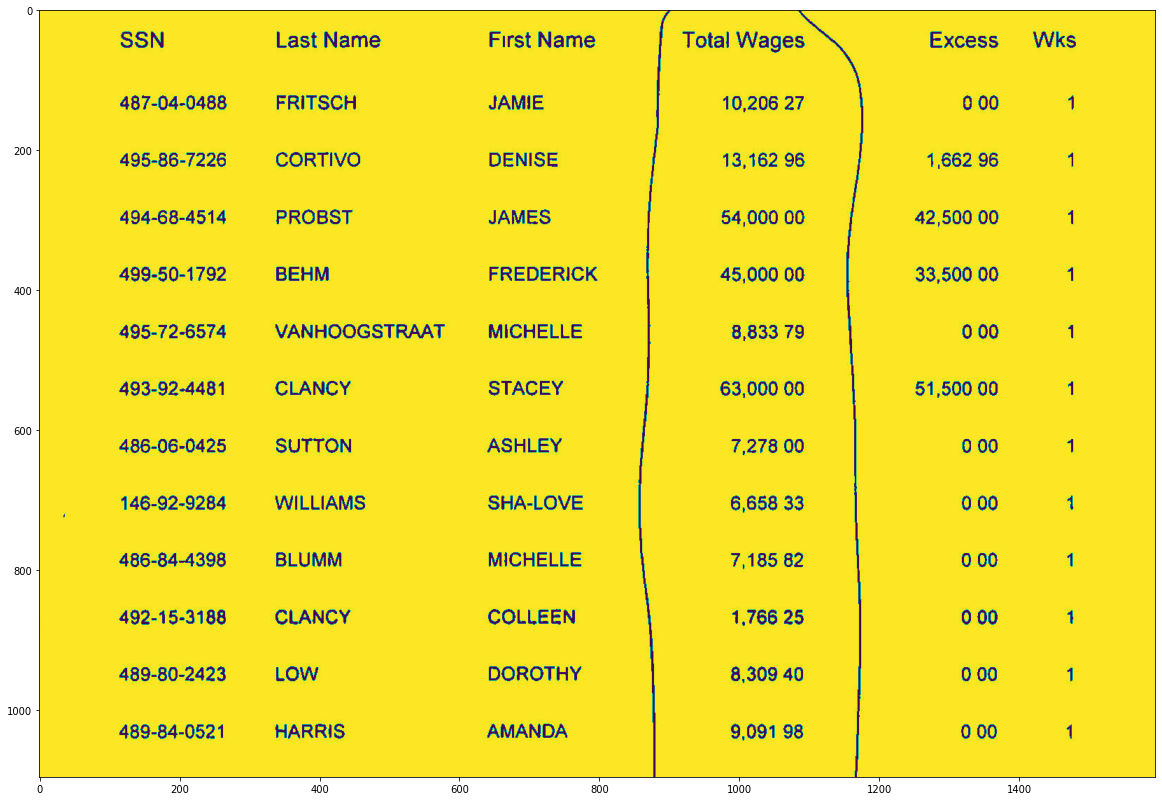

In [9]:
from PIL import Image
import cv2
  
# Opens a image in RGB mode
im = Image.open(r"/home/vimal/Documents/table_detect_samples/pre/0147965000.jpeg")
#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /10
right = 1600
bottom = 3 * height / 5
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(20,20))
plt.imshow(im1)
im1.save('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0147965000_crop.jpeg')
# Shows the image in image viewer

In [10]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0147965000_crop.jpeg')
img = cv2.resize(img, (int(img.shape[1] + (img.shape[1] * .1)),
                       int(img.shape[0] + (img.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)




       SSN           Last Name           First Name        Total Wages            Excess   Wks 
       487-04-0488   FRITSCH             JAMIE                10.206 27              0.00     1 
       495-86-7226   CORTIVO             DENISE               13.162 96          1662 96      1 
       494-68-4514   PROBST              JAMES                54.000 00         42500 00      1 
       499-50-1792   BEHM                FREDERICK            45.000 00         33.500 00     1 
       495-72-6574   VANHOOGSTRAAT       MICHELLE              8833 79               000      1 
       493-92-4481   CLANCY              STACEY               63.000 00         51.500 00     1 
       486-06-0425   SUTTON              ASHLEY                7.278 00              000      1 
       146-92-9284  WILLIAMS             SHA-LOVE              6.658 33             000       1 
       486-84-4398   BLUMM               MICHELLE              7185 82              000       1 
       492-15-3188   CLANCY   

In [11]:
text_file = open("/home/vimal/Documents/table_detect_samples/unstructured tables/text/0147965000_text.txt", "wt")
n = text_file.write(text)
text_file.close()

In [12]:
import pandas as pd
  
# readinag given csv file
# and creating dataframe
dataframe1 = pd.read_csv("/home/vimal/Documents/table_detect_samples/unstructured tables/text/0147965000_text.txt")
  
# storing this dataframe in a csv file
x=dataframe1.to_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/CSV/0147965000_excel.csv', 
                  index = None)

In [13]:
# importing pandas as pd
import pandas as pd
# import the StrinIO function
# from io module
from io import StringIO
# wrap the string data in StringIO function
StringData = StringIO(text)
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =";")
# Print the dataframe
print(df)

          SSN           Last Name           First Name        Total Wages            Excess   Wks 
0          487-04-0488   FRITSCH             JAMIE...                                             
1          495-86-7226   CORTIVO             DENIS...                                             
2          494-68-4514   PROBST              JAMES...                                             
3          499-50-1792   BEHM                FREDE...                                             
4          495-72-6574   VANHOOGSTRAAT       MICHE...                                             
5          493-92-4481   CLANCY              STACE...                                             
6          486-06-0425   SUTTON              ASHLE...                                             
7          146-92-9284  WILLIAMS             SHA-L...                                             
8          486-84-4398   BLUMM               MICHE...                                             
9         

In [14]:
df.columns[0].split()

['SSN', 'Last', 'Name', 'First', 'Name', 'Total', 'Wages', 'Excess', 'Wks']

In [15]:
df.shape

(12, 1)

In [16]:
print(text)


       SSN           Last Name           First Name        Total Wages            Excess   Wks 
       487-04-0488   FRITSCH             JAMIE                10.206 27              0.00     1 
       495-86-7226   CORTIVO             DENISE               13.162 96          1662 96      1 
       494-68-4514   PROBST              JAMES                54.000 00         42500 00      1 
       499-50-1792   BEHM                FREDERICK            45.000 00         33.500 00     1 
       495-72-6574   VANHOOGSTRAAT       MICHELLE              8833 79               000      1 
       493-92-4481   CLANCY              STACEY               63.000 00         51.500 00     1 
       486-06-0425   SUTTON              ASHLEY                7.278 00              000      1 
       146-92-9284  WILLIAMS             SHA-LOVE              6.658 33             000       1 
       486-84-4398   BLUMM               MICHELLE              7185 82              000       1 
       492-15-3188   CLANCY   

In [17]:
type(text)

str

In [18]:
text_file = open("text.txt", "wt")
n = text_file.write(text)
text_file.close()

In [19]:
import pandas as pd
df = pd.read_csv('text (copy).txt', sep=",",header=None)
print(df)

              0              1           2            3          4     5
0           SSN      Last Name  First Name  Total Wages     Excess  Wks 
1   487-04-0488        FRITSCH       JAMIE    10.206 27       0.00    1 
2   495-86-7226        CORTIVO      DENISE    13.162 96    1662 96     1
3   494-68-4514         PROBST       JAMES    54.000 00   42500 00     1
4   499-50-1792           BEHM   FREDERICK    45.000 00  33.500 00     1
5   495-72-6574  VANHOOGSTRAAT    MICHELLE      8833 79        000    1 
6   493-92-4481         CLANCY      STACEY    63.000 00  51.500 00     1
7   486-06-0425         SUTTON      ASHLEY     7.278 00        000     1
8   146-92-9284       WILLIAMS    SHA-LOVE     6.658 33        000     1
9   486-84-4398          BLUMM    MICHELLE      7185 82        000     1
10  492-15-3188         CLANCY     COLLEEN     1.766 25        000     1
11  489-80-2423            LOW     DOROTHY     8.309 40        000     1
12  489-84-0521         HARRIS      AMANDA     9.09

In [20]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [21]:
df = df.rename(columns=df.iloc[0])
df[1:]


,SSN,Last Name,First Name,Total Wages,Excess,Wks
1,487-04-0488,FRITSCH,JAMIE,10.206 27,0.00,1
2,495-86-7226,CORTIVO,DENISE,13.162 96,1662 96,1
3,494-68-4514,PROBST,JAMES,54.000 00,42500 00,1
4,499-50-1792,BEHM,FREDERICK,45.000 00,33.500 00,1
5,495-72-6574,VANHOOGSTRAAT,MICHELLE,8833 79,000,1
6,493-92-4481,CLANCY,STACEY,63.000 00,51.500 00,1
7,486-06-0425,SUTTON,ASHLEY,7.278 00,000,1
8,146-92-9284,WILLIAMS,SHA-LOVE,6.658 33,000,1
9,486-84-4398,BLUMM,MICHELLE,7185 82,000,1
10,492-15-3188,CLANCY,COLLEEN,1.766 25,000,1
